<a href="https://colab.research.google.com/github/nitinfaye/Text-classification/blob/main/Text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Owner*
 
NItin Faye

**business Problem**

Meta data: 
1. Text : contains text from blockchain domain
2. Target : traget class

Prepare a report (pdf/pptx) based on your model result. 
Report should contain below points. 
1. Your thoughts on problem or what is your approach to solve the problem
2. Model Interpretation
3. Train & test accuracy score, classification report
4. Limitation of the model. 
5. You can add your own points as well

Create a classification model based on the below mentioned dataset.

Dataset Link: https://docs.google.com/spreadsheets/d/1DLL6BTXiHHsn1w9NvVi0BZbass0QU0RSvKEXtJlwfCM/edit?usp=sharing



In [1]:
import os
import csv
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from scipy.sparse import csr_matrix, lil_matrix
#from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
data = pd.read_csv("/content/drive/MyDrive/root2ai.csv")
data.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


In [5]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["Tag"] = lb_make.fit_transform(data["Target"])
data[["Target", "Tag"]].head(11)

,Target,Tag
0,Blockchain,1
1,Blockchain,1
2,Blockchain,1
3,Blockchain,1
4,Blockchain,1
5,Blockchain,1
6,Blockchain,1
7,Blockchain,1
8,Blockchain,1
9,Blockchain,1


In [6]:
data.shape

(22704, 3)

In [7]:
data['Target']= data['Target'].replace(0)
data.dropna(inplace=True)
missing_values_check = data.isnull().sum()
print(missing_values_check)

Text      0
Target    0
Tag       0
dtype: int64


In [8]:
rowSums = data.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==1).sum(axis=0)

print("Total number of comments = ",len(data))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data)-clean_comments_count))

Total number of comments =  22701
Number of clean comments =  1375
Number of comments with labels = 21326


In [9]:
categories = list(data.columns.values)
categories = categories[2:]
print(categories)

['Tag']


In [10]:
counts = []
for category in categories:
    counts.append((category, data[category].sum()))
df_stats = pd.DataFrame(counts, columns=['Category', 'Number of Comments'])
df_stats

,Category,Number of Comments
0,Tag,99085


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


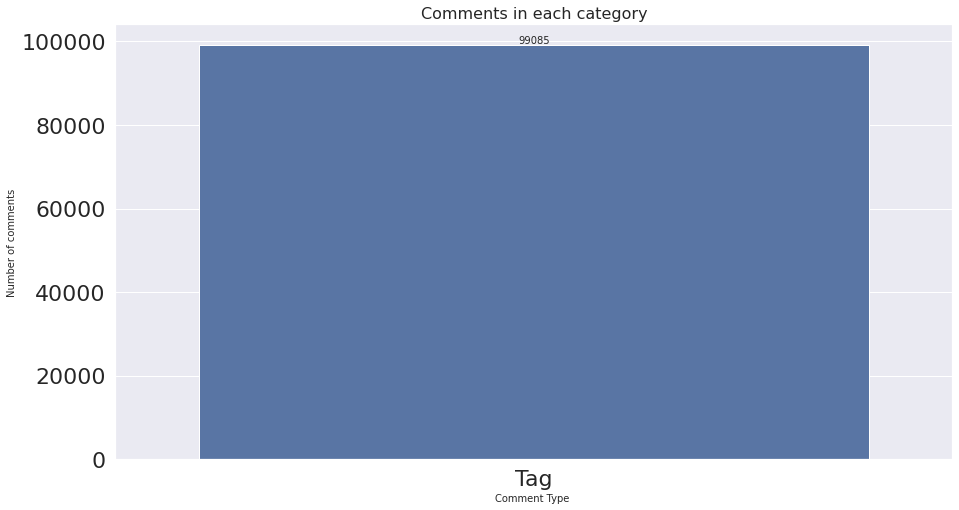

In [11]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=16)
plt.ylabel('Number of comments', fontsize=10)
plt.xlabel('Comment Type ', fontsize=10)

#adding the text labels
rects = ax.patches
labels = data.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=10)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


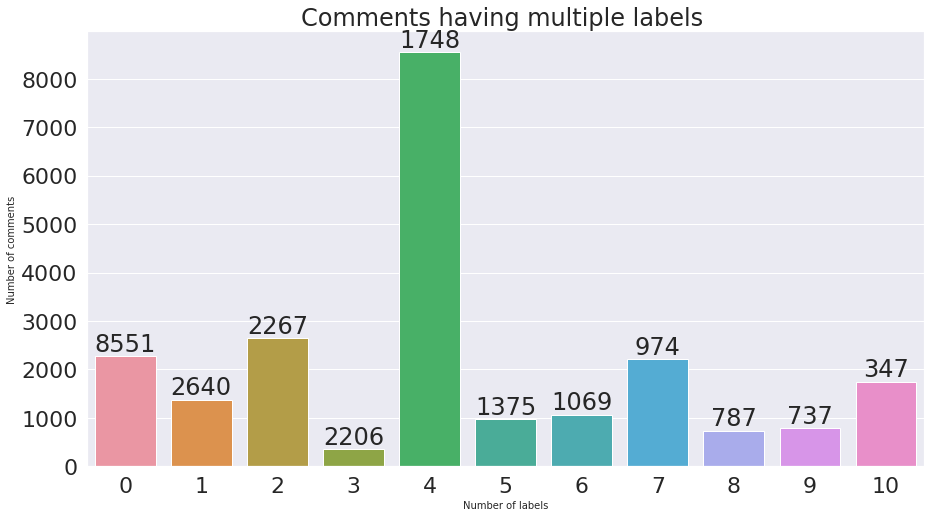

In [12]:
rowSums = data.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
#multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=10)
plt.xlabel('Number of labels', fontsize=10)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

#WordCloud representation of most used words in each category of comments

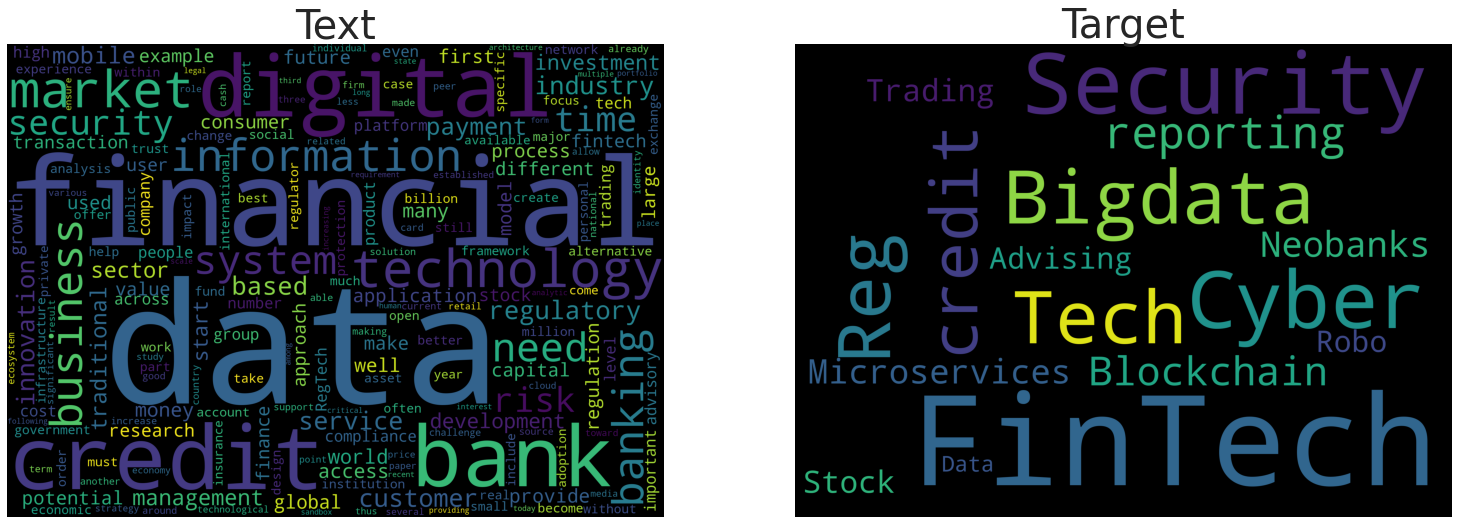

In [13]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# Text
subset = data[data.Text==0]
text = data.Text.values
cloud_Text = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Text",fontsize=40)
plt.imshow(cloud_Text)

# Target
subset = data[data.Target==1]
text = data.Target.values
cloud_Target = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Target",fontsize=40)
plt.imshow(cloud_Target)


##Data Pre-Processing

In [14]:
data = data.loc[np.random.choice(data.index, size=5000)]
data.shape

(5000, 3)

Cleaning Data

In [15]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [16]:
data['Text'] = data['Text'].str.lower()
data['Text'] = data['Text'].apply(cleanHtml)
data['Text'] = data['Text'].apply(cleanPunc)
data['Text'] = data['Text'].apply(keepAlpha)

Removing Stop Words

In [17]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['Text'] = data['Text'].apply(removeStopWords)
#data['tag'] = data['tag'].apply(removeStopWords)

Stemming

In [18]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['Text'] = data['Text'].apply(stemming)
#data['tag'] = data['tag'].apply(stemming)

#Train-Test Split


In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(3500, 3)
(1500, 3)


In [20]:
train_text = train['Text']
test_text = test['Text']
print(train_text)

1432                             data gather data warehous
13465      recent budget soon ensur wide adopt mass market
11127    would enjoy privileg build high effici scratch...
2592                                               faccess
1482     intuit user experi extens possibl report creation
                               ...                        
9352                primer industri oper space rapid chang
14494    seem trivial experi bank well prepar lead grea...
21515    fall notabl initia tive effort technolog indus...
7322     time frame regulatori approv review applic inf...
15464    smart avail base electron currenc transpar fin...
Name: Text, Length: 3500, dtype: object


#TF-IDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [22]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['Text','Target'], axis=1)
#y_train = train(labels= ['target'],axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['Text','Target'], axis=1)

In [23]:
x_train

<3500x21821 sparse matrix of type '<class 'numpy.float64'>'
	with 32282 stored elements in Compressed Sparse Row format>

#Classification

In [24]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing Tag comments...**

Test accuracy is 0.4653333333333333


CPU times: user 83.1 ms, sys: 50.8 ms, total: 134 ms
Wall time: 1.35 s


In [25]:
x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

In [26]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##Gaussian Naive bayes base allgoritm

In [27]:
%%time

# with a gaussian naive bayes base classifier
classifier = GaussianNB()

# train
classifier.fit(x_train, y_train)

# predict
prediction = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,prediction))
print("\n")
print("Training set score: {:.2f}".format(classifier.score(x_train, y_train)))
print("Testing set score: {:.2f}".format(classifier.score(x_test, y_test)))
print("\n")
print(classification_report(y_test,prediction))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =  0.528


Training set score: 0.79
Testing set score: 0.53


              precision    recall  f1-score   support

           0       0.61      0.52      0.56       146
           1       0.47      0.45      0.46        94
           2       0.54      0.46      0.50       164
           3       0.05      0.15      0.08        20
           4       0.56      0.65      0.61       555
           5       0.63      0.45      0.53        73
           6       0.33      0.20      0.25        70
           7       0.66      0.57      0.61       145
           8       0.31      0.33      0.32        57
           9       0.50      0.49      0.50        55
          10       0.53      0.48      0.50       121

    accuracy                           0.53      1500
   macro avg       0.47      0.43      0.45      1500
weighted avg       0.54      0.53      0.53      1500

CPU times: user 8.66 s, sys: 323 ms, total: 8.98 s
Wall time: 8.92 s


Classifier Chains

Multi-label classificattion 

In [28]:
# using classifier chains
from sklearn.linear_model import LogisticRegression

LogisticRegression alogorithms

In [29]:
%%time

# initialize classifier chains multi-label classifier
classifier= LogisticRegression()

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
prediction = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,prediction))
print("\n")
print("Training set score: {:.2f}".format(classifier.score(x_train, y_train)))
print("Testing set score: {:.2f}".format(classifier.score(x_test, y_test)))
print("\n")
print(classification_report(y_test,prediction))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =  0.484


Training set score: 0.68
Testing set score: 0.48


              precision    recall  f1-score   support

           0       0.76      0.25      0.38       146
           1       0.86      0.06      0.12        94
           2       0.78      0.26      0.39       164
           3       0.00      0.00      0.00        20
           4       0.42      0.98      0.59       555
           5       1.00      0.07      0.13        73
           6       1.00      0.04      0.08        70
           7       0.93      0.28      0.43       145
           8       1.00      0.04      0.07        57
           9       0.90      0.16      0.28        55
          10       0.82      0.31      0.45       121

    accuracy                           0.48      1500
   macro avg       0.77      0.22      0.27      1500
weighted avg       0.69      0.48      0.41      1500

CPU times: user 1min 40s, sys: 14.9 s, total: 1min 55s
Wall time: 59.4 s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##KNeighborsClassifier Algorithm

In [30]:
%%time
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

prediction = classifier.predict(x_test)
print("\n")
# accuracy
print("Accuracy = ",accuracy_score(y_test,prediction))
print("\n")
print("Training set score: {:.2f}".format(classifier.score(x_train, y_train)))
print("Testing set score: {:.2f}".format(classifier.score(x_test, y_test)))
print("\n")
print(classification_report(y_test,prediction))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.




Accuracy =  0.26666666666666666


Training set score: 0.98
Testing set score: 0.27


              precision    recall  f1-score   support

           0       0.14      0.68      0.23       146
           1       0.82      0.15      0.25        94
           2       0.50      0.25      0.33       164
           3       0.50      0.10      0.17        20
           4       0.68      0.20      0.31       555
           5       0.83      0.21      0.33        73
           6       0.58      0.16      0.25        70
           7       0.14      0.40      0.21       145
           8       0.31      0.19      0.24        57
           9       0.50      0.24      0.32        55
          10       0.92      0.20      0.33       121

    accuracy                           0.27      1500
   macro avg       0.54      0.25      0.27      1500
weighted avg       0.57      0.27      0.29      1500

CPU times: user 7min 21s, sys: 573 ms, total: 7min 22s
Wall time: 7min 19s


In [31]:
%%time
classifier = KNeighborsClassifier(n_neighbors =7, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

prediction = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,prediction))
print("\n")
print("Training set score: {:.2f}".format(classifier.score(x_train, y_train)))
print("Testing set score: {:.2f}".format(classifier.score(x_test, y_test)))
print("\n")
print(classification_report(y_test,prediction))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy =  0.12466666666666666


Training set score: 0.23
Testing set score: 0.12


              precision    recall  f1-score   support

           0       0.10      0.84      0.18       146
           1       1.00      0.01      0.02        94
           2       0.56      0.03      0.06       164
           3       0.00      0.00      0.00        20
           4       0.53      0.03      0.06       555
           5       0.00      0.00      0.00        73
           6       0.00      0.00      0.00        70
           7       0.14      0.26      0.18       145
           8       0.00      0.00      0.00        57
           9       1.00      0.02      0.04        55
          10       0.67      0.02      0.03       121

    accuracy                           0.12      1500
   macro avg       0.36      0.11      0.05      1500
weighted avg       0.43      0.12      0.07      1500

CPU times: user 17min 47s, sys: 953 ms, total: 17min 48s
Wall time: 17min 43s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##ARTIFITIAL NEURAL NETWORK
Building the ANN

In [32]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [33]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [34]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [35]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [36]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

##Training the ANN

Compiling the ANN

In [37]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [38]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
110/110 [==============================] - 2s 8ms/step - loss: 0.1055 - accuracy: 0.0691
Epoch 2/100
110/110 [==============================] - 1s 7ms/step - loss: -3.8637 - accuracy: 0.0703
Epoch 3/100
110/110 [==============================] - 1s 7ms/step - loss: -15.3173 - accuracy: 0.0703
Epoch 4/100
110/110 [==============================] - 1s 8ms/step - loss: -39.2548 - accuracy: 0.0703
Epoch 5/100
110/110 [==============================] - 1s 8ms/step - loss: -80.9361 - accuracy: 0.0703
Epoch 6/100
110/110 [==============================] - 1s 7ms/step - loss: -144.7538 - accuracy: 0.0703
Epoch 7/100
110/110 [==============================] - 1s 7ms/step - loss: -234.7931 - accuracy: 0.0703
Epoch 8/100
110/110 [==============================] - 1s 8ms/step - loss: -353.9467 - accuracy: 0.0703
Epoch 9/100
110/110 [==============================] - 1s 7ms/step - loss: -505.0755 - accuracy: 0.0703
Epoch 10/100
110/110 [==============================] - 1s 7ms/step - lo

### Predicting the Test set results

In [41]:
y_pred = ann.predict(x_test)

### Making the Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.06266666666666666